In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Daily Demand Forecasting Orders(Ordens de Previsão de Demanda Diária)

### O banco de dados foi coletado durante 60 dias, este é um banco de dados real de uma empresa brasileira de grande logística. Doze atributos preditivos e um alvo que é o total de pedidos diários.


In [2]:
df = pd.read_csv("Daily_Demand_Forecasting_Orders.csv", sep = ";")

## Dicionário das Colunas

Aqui está um dicionário que inclui o nome original e a descrição de cada coluna:

| Nome Original                                     | Nome da Coluna                                   | Descrição                                               |
|--------------------------------------------------|--------------------------------------------------|---------------------------------------------------------|
| Week of the month (first week, second, third, fourth or fifth week) | Semana do mês (primeira semana, segunda, terceira, quarta ou quinta semana) | Refere-se à semana específica do mês (primeira, segunda, terceira, quarta ou quinta semana) |
| Day of the week (Monday to Friday)                | Dia da semana (segunda-feira a sexta-feira)      | Representa o dia da semana (segunda-feira a sexta-feira) |
| Non-urgent order                                  | Pedido não urgente                               | Indica a presença de um pedido que não é urgente         |
| Urgent order                                      | Pedido urgente                                    | Indica a presença de um pedido urgente                   |
| Order type A                                      | Tipo de pedido A                                 | Representa o tipo de pedido A                            |
| Order type B                                      | Tipo de pedido B                                 | Representa o tipo de pedido B                            |
| Order type C                                      | Tipo de pedido C                                 | Representa o tipo de pedido C                            |
| Fiscal sector orders                              | Pedidos do setor fiscal                           | Indica os pedidos provenientes do setor fiscal           |
| Orders from the traffic controller sector         | Pedidos do setor de controlador de tráfego        | Indica os pedidos provenientes do setor de controlador de tráfego |
| Banking orders (1)                                | Pedidos bancários (1)                            | Representa um tipo de pedido bancário (1)                |
| Banking orders (2)                                | Pedidos bancários (2)                            | Representa um tipo de pedido bancário (2)                |
| Banking orders (3)                                | Pedidos bancários (3)                            | Representa um tipo de pedido bancário (3)                |
| Target (Total orders)                             | Meta (Total de pedidos)                          | Representa a meta de total de pedidos                    |



In [3]:
df.head(15)

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


In [4]:
df.describe()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Week of the month (first week, second, third, fourth or fifth week  60 non-null     int64  
 1   Day of the week (Monday to Friday)                                  60 non-null     int64  
 2   Non-urgent order                                                    60 non-null     float64
 3   Urgent order                                                        60 non-null     float64
 4   Order type A                                                        60 non-null     float64
 5   Order type B                                                        60 non-null     float64
 6   Order type C                                                        60 non-null     float64
 7   Fiscal sector order

## Grafico de barra para demonstrar o fluxo de pedidos A,B e C em semana do mês.

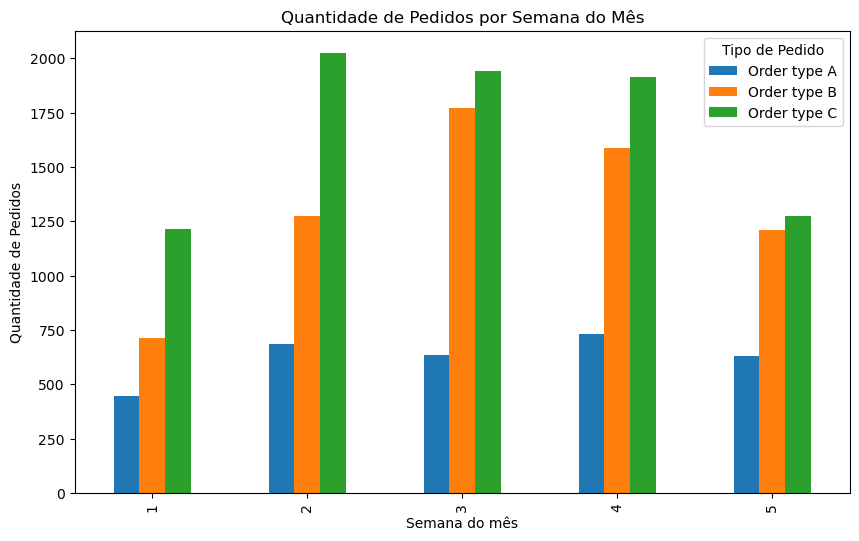

In [6]:
pedidos_por_semana = df.groupby('Week of the month (first week, second, third, fourth or fifth week')[['Order type A', 'Order type B', 'Order type C']].sum()

pedidos_por_semana.plot(kind='bar', figsize=(10, 6))
plt.title('Quantidade de Pedidos por Semana do Mês')
plt.xlabel('Semana do mês')
plt.ylabel('Quantidade de Pedidos')
plt.legend(title='Tipo de Pedido')
plt.show()

### Vemos que a ordem de pedido mais solicitada é a "C", em sequencia a "B" e o menos solicitado "A".

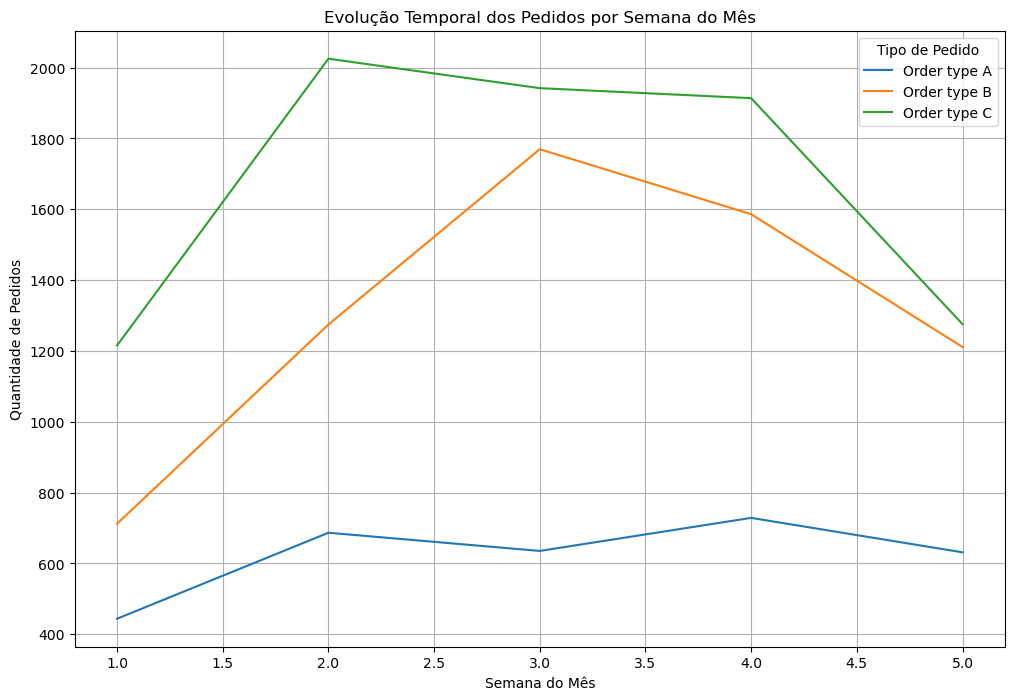

In [15]:
pedidos_por_semana = df.groupby('Week of the month (first week, second, third, fourth or fifth week')[['Order type A', 'Order type B', 'Order type C']].sum()

# Plotando o gráfico de linha temporal
pedidos_por_semana.plot(kind='line', figsize=(12, 8))
plt.title('Evolução Temporal dos Pedidos por Semana do Mês')
plt.xlabel('Semana do Mês')
plt.ylabel('Quantidade de Pedidos')
plt.legend(title='Tipo de Pedido')
plt.grid(True)
plt.show()

### O grafico de linha acima está identificando um crescimento ate a teceira semana, conforme se aproxima do termino do mes, as ordens de pedidos caem consideravelmente. 

### O pedido C h um pico ate a segunda semana, porem vemos uma queda no inicio da quarta semana. O pedido B cresce entre a primeira e terceira semana, em seguida há um declinio ate a quinta semana. 

### O pedido A mesmo sendo em menor numero se mantem constante com altos e baixos, crescimento ate segunda semana, com queda entre a segunda e terceira e novamente cresce ate a quarta semana e por fim cai igualmente aos demais pedidos conforme se aproxima do fim do mês.

## Neste grafico a seguir, analisaremos a quantidade de ordens de pedidos que foram solicitados por dia da semana e pela semana do mês.

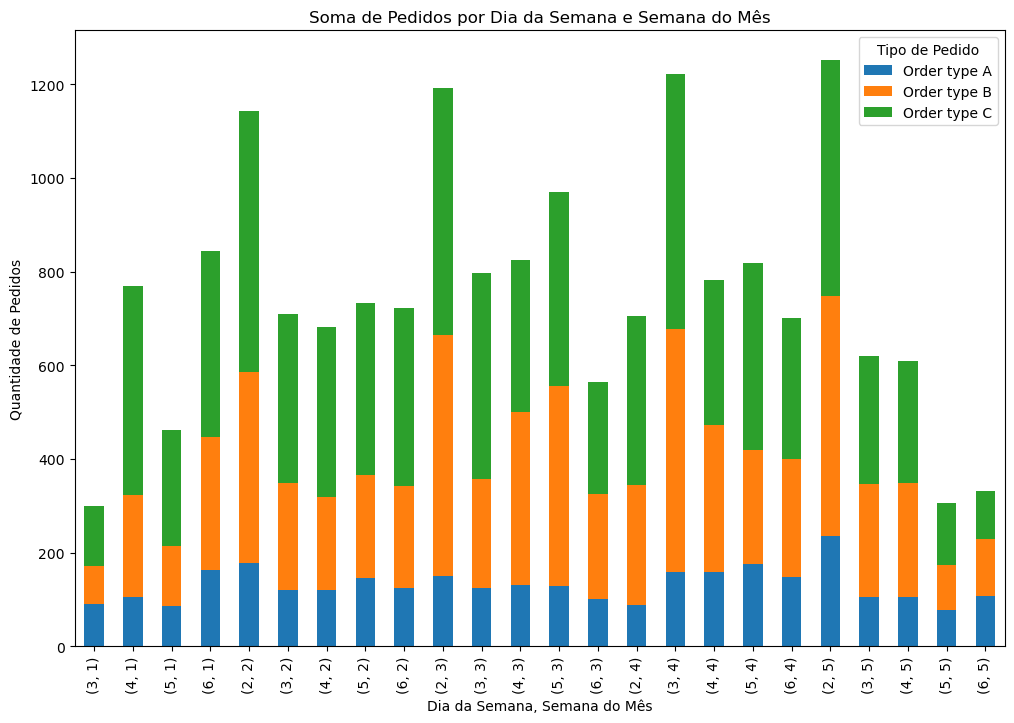

In [14]:
pedidos_por_dia_semana = df.groupby(['Week of the month (first week, second, third, fourth or fifth week', 'Day of the week (Monday to Friday)'])[['Order type A', 'Order type B', 'Order type C']].sum()

# Reordenando os níveis do índice para facilitar a plotagem
pedidos_por_dia_semana = pedidos_por_dia_semana.reorder_levels(['Day of the week (Monday to Friday)', 'Week of the month (first week, second, third, fourth or fifth week'])

# Plotando o gráfico de barras empilhadas
pedidos_por_dia_semana.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title('Soma de Pedidos por Dia da Semana e Semana do Mês')
plt.xlabel('Dia da Semana, Semana do Mês')
plt.ylabel('Quantidade de Pedidos')
plt.legend(title='Tipo de Pedido')
plt.show()

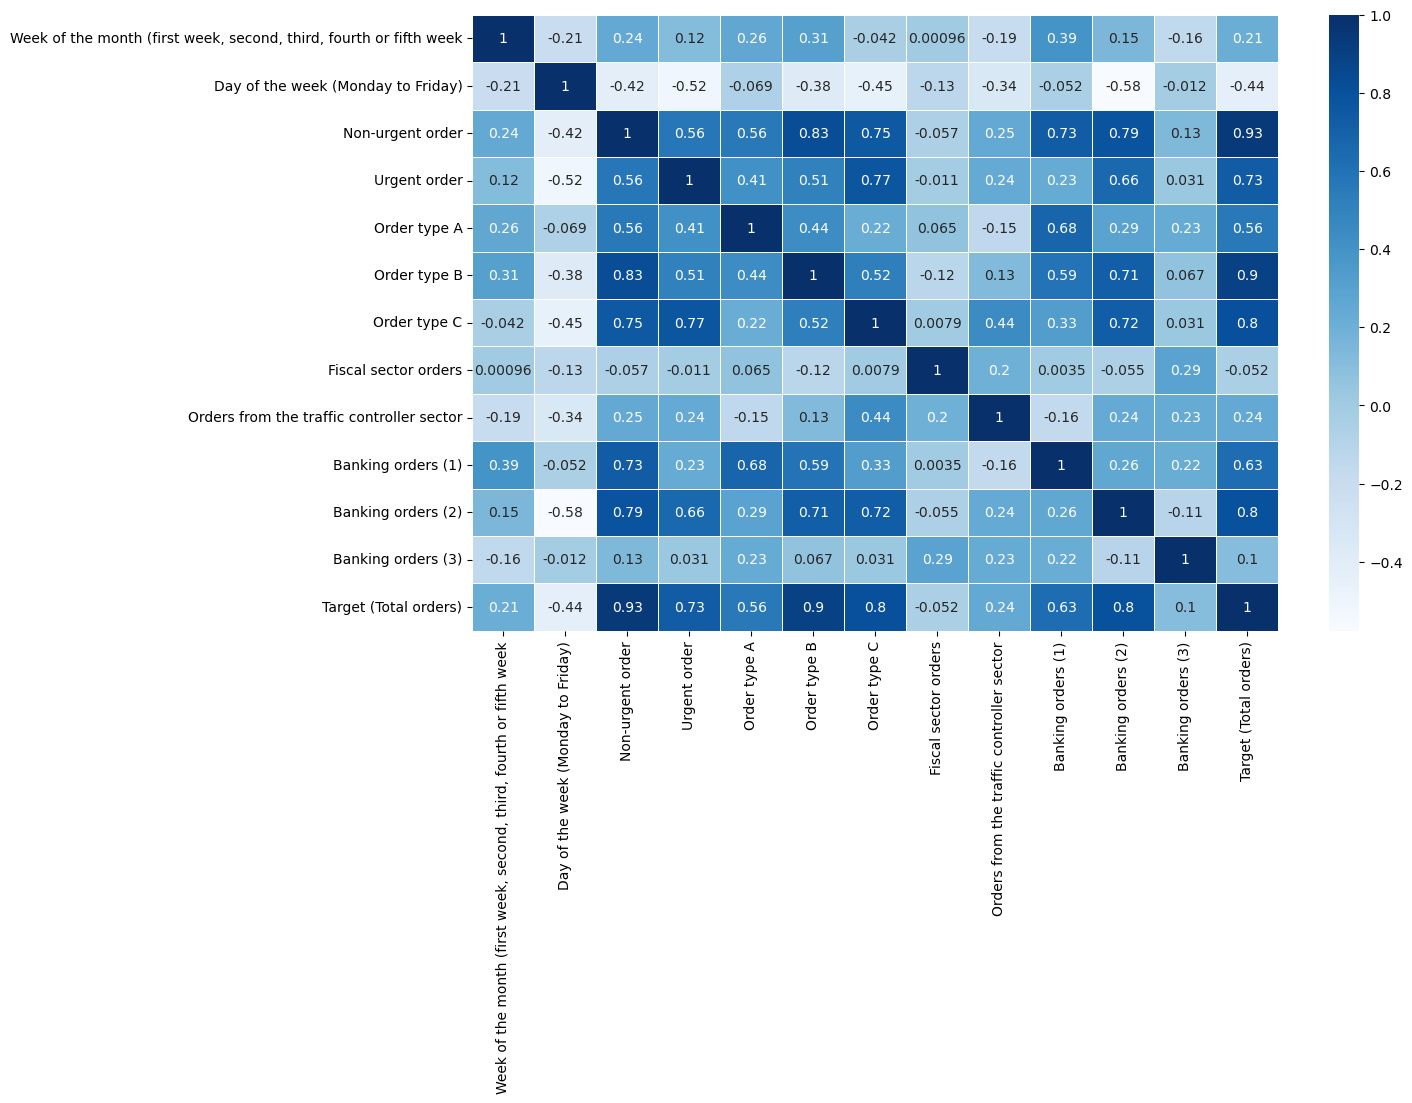

In [8]:
fig, ax = plt.subplots(figsize=(13,8))

_= sns.heatmap(df.corr(), cmap = 'Blues', linewidth = 0.4, annot = True)